In [1]:
!git clone https://github.com/ultralytics/yolov5 

Cloning into 'yolov5'...
remote: Enumerating objects: 9756, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9756 (delta 0), reused 4 (delta 0), pack-reused 9751
Receiving objects: 100% (9756/9756), 10.00 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (6784/6784), done.


In [2]:
%cd /content/yolov5
%pip install -qr requirements.txt  # install dependencies

/content/yolov5
     |████████████████████████████████| 636 kB 5.3 MB/s 


In [3]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu111 (Tesla K80)


In [4]:
%cd ..

/content


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
!ls "/content/gdrive/MyDrive"

'Colab Notebooks'   DLCVNLP	  yolo_custom_model_Training
 detrectron2	    Thermal.zip


In [7]:
%cd /content
!unzip /content/gdrive/MyDrive/Thermal.zip

/content
Archive:  /content/gdrive/MyDrive/Thermal.zip
   creating: train/images/
  inflating: train/images/FLIR_08864.jpeg  
  inflating: train/images/FLIR_08865.jpeg  
  inflating: train/images/FLIR_08866.jpeg  
  inflating: train/images/FLIR_08867.jpeg  
  inflating: train/images/FLIR_08868.jpeg  
  inflating: train/images/FLIR_08869.jpeg  
  inflating: train/images/FLIR_08870.jpeg  
  inflating: train/images/FLIR_08871.jpeg  
  inflating: train/images/FLIR_08872.jpeg  
  inflating: train/images/FLIR_08873.jpeg  
  inflating: train/images/FLIR_08874.jpeg  
  inflating: train/images/FLIR_08875.jpeg  
  inflating: train/images/FLIR_08876.jpeg  
  inflating: train/images/FLIR_08877.jpeg  
  inflating: train/images/FLIR_08878.jpeg  
  inflating: train/images/FLIR_08879.jpeg  
  inflating: train/images/FLIR_08880.jpeg  
  inflating: train/images/FLIR_08881.jpeg  
  inflating: train/images/FLIR_08882.jpeg  
  inflating: train/images/FLIR_08883.jpeg  
  inflating: train/images/FLIR_08884.j

In [8]:
%cd /content/yolov5
!pip install wandb

/content/yolov5
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 180 kB 47.7 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 139 kB 41.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=64c12ccbca4e44b3067763f72939546b60d4104b1d0c38f0d0e07b57c3571f38
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=dd05f57aec516bd26cb01e26dd1f671c772b74a1ff8d6e84272b91801c6113ad
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [9]:
!pwd

/content/yolov5


In [11]:
# Train YOLOv5s on COCO128 for 10 epochs

!python train.py --img 640 --batch 4 --epochs 150 --data coco128.yaml --weights yolov5s.pt --cache 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=150, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v5.0-503-ga0e1504 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, mome

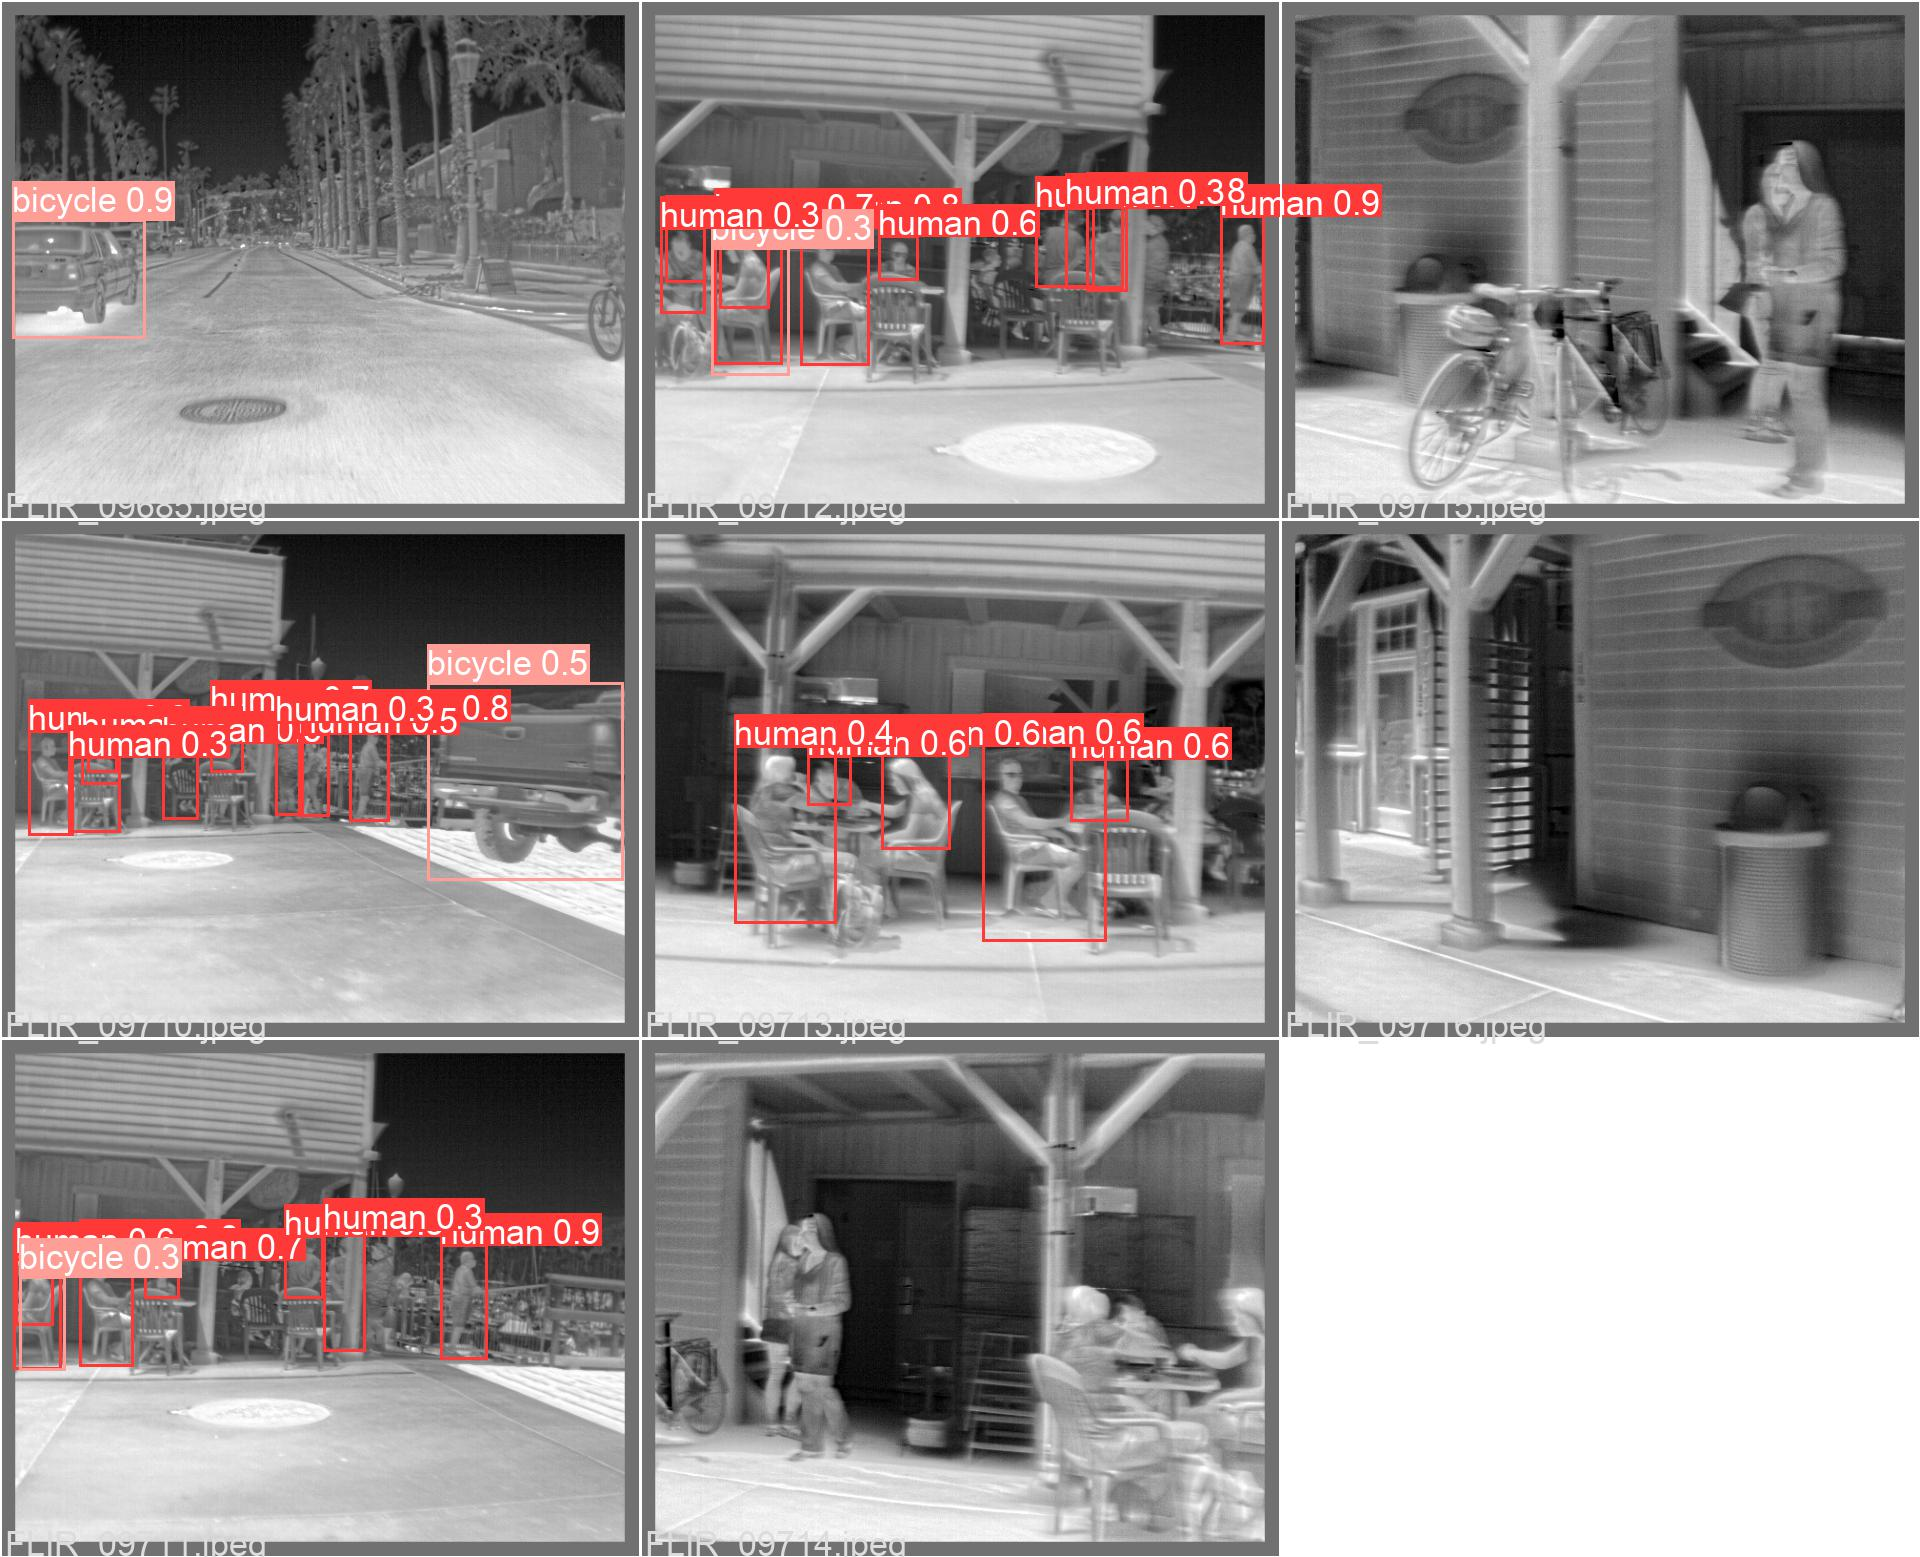

In [12]:
Image(filename='/content/yolov5/runs/train/exp2/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='/content/yolov5/runs/train/exp2/val_batch1_labels.jpg', width=800)  # test batch 0 labels
Image(filename='/content/yolov5/runs/train/exp2/val_batch0_pred.jpg', width=800)  # test batch 0 predictions

In [14]:
## Prediction Images

!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.4 --source /content/val/images/FLIR_09725.jpeg

detect: weights=['runs/train/exp2/weights/last.pt'], source=/content/val/images/FLIR_09725.jpeg, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-503-ga0e1504 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/val/images/FLIR_09725.jpeg: 512x640 9 humans, 1 bicycle, Done. (0.034s)
Speed: 0.7ms pre-process, 33.7ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [15]:
## Prediction video

!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.4 --source /content/Thermal_video.mp4


detect: weights=['runs/train/exp2/weights/last.pt'], source=/content/Thermal_video.mp4, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-503-ga0e1504 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
video 1/1 (1/60) /content/Thermal_video.mp4: 512x640 4 humans, 1 bicycle, Done. (0.034s)
video 1/1 (2/60) /content/Thermal_video.mp4: 512x640 7 humans, 2 bicycles, Done. (0.032s)
video 1/1 (3/60) /content/Thermal_video.mp4: 512x640 7 humans, 2 bicycles, Done. (0.032s)
video 1/1 (4/60) /content/Thermal_video.mp4: 512x640 7 humans, 2 bicycles, Done. (0.032s)
video 1/1 (5/60) /content/Thermal_video